In [1]:
import pandas as pd
from ipyleaflet import Map, Marker, LayerGroup, Heatmap, LayersControl, WidgetControl
from ipywidgets import HTML, widgets
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
import numpy as np
from scipy.stats import pearsonr

In [2]:
sensors = pd.read_csv('sensor_locations.csv')

In [3]:
sensors.head()

id   latitude  longitude
0    3  50.057748  19.961375
1  140  50.057747  19.961374
2  142  50.084816  19.878066
3  147  50.048924  19.962262
4  169  50.048699  20.101569

In [4]:
m = Map(center=(50.0614300, 19.9365800), zoom=11)
markers_layer = LayerGroup()
for index, sensor in sensors.iterrows():
    marker = Marker(location=(sensor['latitude'], sensor['longitude']))
    marker.popup = HTML(str(int(sensor['id'])))
    markers_layer.add_layer(marker)
    
m.add_layer(markers_layer)
display(m)

Map(center=[50.06143, 19.93658], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [5]:
filespath = ['data/{}'.format(file) for file in listdir('data')]

In [6]:
data = (pd.read_csv(file, engine='python') for file in filespath)

In [7]:
data = pd.concat(data)

In [8]:
data.sort_values('UTC time', inplace=True)

In [9]:
data

UTC time  3_temperature  3_humidity  3_pressure  3_pm1  \
0    2017-01-01T00:00:00            NaN         NaN         NaN    NaN   
1    2017-01-01T01:00:00            NaN         NaN         NaN    NaN   
2    2017-01-01T02:00:00            NaN         NaN         NaN    NaN   
3    2017-01-01T03:00:00            NaN         NaN         NaN    NaN   
4    2017-01-01T04:00:00            NaN         NaN         NaN    NaN   
..                   ...            ...         ...         ...    ...   
572  2017-12-24T20:00:00            NaN         NaN         NaN    NaN   
573  2017-12-24T21:00:00            NaN         NaN         NaN    NaN   
574  2017-12-24T22:00:00            NaN         NaN         NaN    NaN   
575  2017-12-24T23:00:00            NaN         NaN         NaN    NaN   
576  2017-12-25T00:00:00            NaN         NaN         NaN    NaN   

     3_pm25  3_pm10  140_temperature  140_humidity  140_pressure  ...  \
0       NaN     NaN              NaN           NaN           NaN  ...   
1       NaN     NaN              NaN           NaN           NaN  ...   
2       NaN     NaN              NaN           NaN           NaN  ...   
3       NaN     NaN              NaN           NaN           NaN  ...   
4       NaN     NaN              NaN           NaN           NaN  ...   
..      ...     ...              ...           ...           ...  ...   
572     NaN     NaN              6.0          87.0      101736.0  ...   
573     NaN     NaN              6.0          88.0      101776.0  ...   
574     NaN     NaN              6.0          85.0      101785.0  ...   
575     NaN     NaN              5.0          88.0      101782.0  ...   
576     NaN     NaN              6.0          88.0      101784.0  ...   

     857_pressure  857_pm1  857_pm25  857_pm10  895_temperature  895_humidity  \
0             NaN      NaN       NaN       NaN              NaN           NaN   
1             NaN      NaN       NaN       NaN              NaN           NaN   
2             NaN      NaN       NaN       NaN              NaN           NaN   
3             NaN      NaN       NaN       NaN              NaN           NaN   
4             NaN      NaN       NaN       NaN              NaN           NaN   
..            ...      ...       ...       ...              ...           ...   
572      101726.0     12.0      15.0      31.0              5.0          85.0   
573      101771.0     12.0      14.0      29.0              5.0          85.0   
574      101788.0     10.0      12.0      26.0              5.0          82.0   
575      101774.0      9.0      11.0      24.0              5.0          85.0   
576      101774.0     10.0      11.0      23.0              5.0          85.0   

     895_pressure  895_pm1  895_pm25  895_pm10  
0             NaN      NaN       NaN       NaN  
1             NaN      NaN       NaN       NaN  
2             NaN      NaN       NaN       NaN  
3             NaN      NaN       NaN       NaN  
4             NaN      NaN       NaN       NaN  
..            ...      ...       ...       ...  
572      101798.0     13.0      15.0      26.0  
573      101840.0     12.0      13.0      23.0  
574      101839.0     10.0      12.0      21.0  
575      101837.0     10.0      12.0      21.0  
576      101840.0     10.0      11.0      20.0  

[8593 rows x 337 columns]

In [10]:
data['UTC time'] = pd.to_datetime(data['UTC time'])

In [11]:
data['month'] = data['UTC time'].dt.month
data['day'] = data['UTC time'].dt.day
data['hour'] = data['UTC time'].dt.hour

In [12]:
# data.hist(figsize=(300, 500), bins=200);

In [13]:
data.head()

UTC time  3_temperature  3_humidity  3_pressure  3_pm1  3_pm25  \
0 2017-01-01 00:00:00            NaN         NaN         NaN    NaN     NaN   
1 2017-01-01 01:00:00            NaN         NaN         NaN    NaN     NaN   
2 2017-01-01 02:00:00            NaN         NaN         NaN    NaN     NaN   
3 2017-01-01 03:00:00            NaN         NaN         NaN    NaN     NaN   
4 2017-01-01 04:00:00            NaN         NaN         NaN    NaN     NaN   

   3_pm10  140_temperature  140_humidity  140_pressure  ...  857_pm10  \
0     NaN              NaN           NaN           NaN  ...       NaN   
1     NaN              NaN           NaN           NaN  ...       NaN   
2     NaN              NaN           NaN           NaN  ...       NaN   
3     NaN              NaN           NaN           NaN  ...       NaN   
4     NaN              NaN           NaN           NaN  ...       NaN   

   895_temperature  895_humidity  895_pressure  895_pm1  895_pm25  895_pm10  \
0              NaN           NaN           NaN      NaN       NaN       NaN   
1              NaN           NaN           NaN      NaN       NaN       NaN   
2              NaN           NaN           NaN      NaN       NaN       NaN   
3              NaN           NaN           NaN      NaN       NaN       NaN   
4              NaN           NaN           NaN      NaN       NaN       NaN   

   month  day  hour  
0      1    1     0  
1      1    1     1  
2      1    1     2  
3      1    1     3  
4      1    1     4  

[5 rows x 340 columns]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8593 entries, 0 to 576
Columns: 340 entries, UTC time to hour
dtypes: datetime64[ns](1), float64(336), int64(3)
memory usage: 22.4 MB


In [15]:
data.describe()

3_temperature  3_humidity     3_pressure        3_pm1       3_pm25  \
count     206.000000  206.000000    1178.000000  1235.000000  1235.000000   
mean       -5.131068   74.718447  101652.880306    70.830769    75.454251   
std         2.174645    9.939247    1020.704947    54.853035    66.299222   
min        -9.000000   38.000000   99160.000000     2.000000     0.000000   
25%        -7.000000   69.000000  100828.500000    33.000000    30.000000   
50%        -6.000000   77.000000  101726.000000    50.000000    52.000000   
75%        -4.000000   82.000000  102352.000000   101.000000   107.500000   
max         2.000000   92.000000  103619.000000   249.000000   314.000000   

            3_pm10  140_temperature  140_humidity   140_pressure      140_pm1  \
count  1235.000000      6506.000000   6506.000000    6683.000000  6631.000000   
mean    112.540891        11.464494     80.271288  101639.084842    26.537023   
std      89.265573         7.630920     17.167440     653.937345    19.283222   
min       3.000000        -6.000000     21.000000   98374.000000     0.000000   
25%      52.000000         6.000000     70.000000  101291.000000    13.000000   
50%      87.000000        11.000000     86.000000  101666.000000    23.000000   
75%     153.000000        17.000000     93.000000  102064.000000    34.000000   
max     440.000000        37.000000    115.000000  103155.000000   160.000000   

       ...     857_pm10  895_temperature  895_humidity   895_pressure  \
count  ...  2653.000000      5443.000000   5443.000000    6337.000000   
mean   ...    65.852997        10.660665     79.759691  101660.566672   
std    ...    56.194746         7.864320     19.397843     649.831280   
min    ...     0.000000        -7.000000     18.000000   98433.000000   
25%    ...    27.000000         4.000000     69.000000  101328.000000   
50%    ...    53.000000        10.000000     85.000000  101686.000000   
75%    ...    85.000000        16.000000     92.000000  102079.000000   
max    ...   373.000000        34.000000    134.000000  103199.000000   

           895_pm1     895_pm25     895_pm10        month          day  \
count  6337.000000  6337.000000  6337.000000  8593.000000  8593.000000   
mean     23.879754    23.922519    41.092788     6.419644    15.481555   
std      16.803287    20.897541    32.908029     3.395054     8.707080   
min       0.000000     0.000000     0.000000     1.000000     1.000000   
25%      13.000000    11.000000    18.000000     3.000000     8.000000   
50%      21.000000    19.000000    33.000000     6.000000    15.000000   
75%      29.000000    30.000000    54.000000     9.000000    23.000000   
max     132.000000   159.000000   239.000000    12.000000    31.000000   

              hour  
count  8593.000000  
mean     11.498662  
std       6.923298  
min       0.000000  
25%       5.000000  
50%      11.000000  
75%      17.000000  
max      23.000000  

[8 rows x 339 columns]

In [16]:
data.fillna(-1)

UTC time  3_temperature  3_humidity  3_pressure  3_pm1  3_pm25  \
0   2017-01-01 00:00:00           -1.0        -1.0        -1.0   -1.0    -1.0   
1   2017-01-01 01:00:00           -1.0        -1.0        -1.0   -1.0    -1.0   
2   2017-01-01 02:00:00           -1.0        -1.0        -1.0   -1.0    -1.0   
3   2017-01-01 03:00:00           -1.0        -1.0        -1.0   -1.0    -1.0   
4   2017-01-01 04:00:00           -1.0        -1.0        -1.0   -1.0    -1.0   
..                  ...            ...         ...         ...    ...     ...   
572 2017-12-24 20:00:00           -1.0        -1.0        -1.0   -1.0    -1.0   
573 2017-12-24 21:00:00           -1.0        -1.0        -1.0   -1.0    -1.0   
574 2017-12-24 22:00:00           -1.0        -1.0        -1.0   -1.0    -1.0   
575 2017-12-24 23:00:00           -1.0        -1.0        -1.0   -1.0    -1.0   
576 2017-12-25 00:00:00           -1.0        -1.0        -1.0   -1.0    -1.0   

     3_pm10  140_temperature  140_humidity  140_pressure  ...  857_pm10  \
0      -1.0             -1.0          -1.0          -1.0  ...      -1.0   
1      -1.0             -1.0          -1.0          -1.0  ...      -1.0   
2      -1.0             -1.0          -1.0          -1.0  ...      -1.0   
3      -1.0             -1.0          -1.0          -1.0  ...      -1.0   
4      -1.0             -1.0          -1.0          -1.0  ...      -1.0   
..      ...              ...           ...           ...  ...       ...   
572    -1.0              6.0          87.0      101736.0  ...      31.0   
573    -1.0              6.0          88.0      101776.0  ...      29.0   
574    -1.0              6.0          85.0      101785.0  ...      26.0   
575    -1.0              5.0          88.0      101782.0  ...      24.0   
576    -1.0              6.0          88.0      101784.0  ...      23.0   

     895_temperature  895_humidity  895_pressure  895_pm1  895_pm25  895_pm10  \
0               -1.0          -1.0          -1.0     -1.0      -1.0      -1.0   
1               -1.0          -1.0          -1.0     -1.0      -1.0      -1.0   
2               -1.0          -1.0          -1.0     -1.0      -1.0      -1.0   
3               -1.0          -1.0          -1.0     -1.0      -1.0      -1.0   
4               -1.0          -1.0          -1.0     -1.0      -1.0      -1.0   
..               ...           ...           ...      ...       ...       ...   
572              5.0          85.0      101798.0     13.0      15.0      26.0   
573              5.0          85.0      101840.0     12.0      13.0      23.0   
574              5.0          82.0      101839.0     10.0      12.0      21.0   
575              5.0          85.0      101837.0     10.0      12.0      21.0   
576              5.0          85.0      101840.0     10.0      11.0      20.0   

     month  day  hour  
0        1    1     0  
1        1    1     1  
2        1    1     2  
3        1    1     3  
4        1    1     4  
..     ...  ...   ...  
572     12   24    20  
573     12   24    21  
574     12   24    22  
575     12   24    23  
576     12   25     0  

[8593 rows x 340 columns]

Trzy mapy: po jednej na rodzaj zanieczyszczenia
Potrzebne dane:
id i lokalizacja czujnika, średnie roczne stężenie danego pyłu

In [17]:
heatmap_data = sensors.loc[:].set_index('id')
for sensor_id in sensors.id.unique():
    for polutant in ['pm1', 'pm10', 'pm25']:
        heatmap_data.loc[sensor_id, '{}_mean'.format(polutant)] = data['{}_{}'.format(sensor_id, polutant)].mean()

In [18]:
heatmap_data

latitude  longitude   pm1_mean   pm10_mean  pm25_mean
id                                                         
3    50.057748  19.961375  70.830769  112.540891  75.454251
140  50.057747  19.961374  26.537023   42.553009  24.392550
142  50.084816  19.878066  61.021106   99.061307  63.125628
147  50.048924  19.962262  37.579535   58.877087  37.139736
169  50.048699  20.101569  25.530686   40.737110  25.382595
170  50.077467  19.895577  29.105201   47.410165  29.978132
171  50.084134  19.968416  31.125558   49.721283  31.413789
172  50.073094  19.886750  30.730448   50.097282  31.541249
173  50.057537  19.897547  28.393223   46.343805  29.145194
174  50.057242  19.914874  31.684902   49.971158  31.136493
176  50.044067  19.998804  30.609230   52.803561  30.722151
177  50.093619  19.924138  33.390096   54.003859  34.500836
178  50.033195  19.900714  39.610973   66.447880  40.185536
179  50.077690  19.935777  27.962967   44.978112  28.257690
180  50.018006  19.983935  29.287934   46.006074  28.482537
181  50.055163  19.947015  30.347239   48.814368  30.836601
182  50.020586  20.022960  32.945853   52.493563  33.176377
183  50.098304  19.879415  27.352529   44.560108  27.588286
184  50.047736  19.919646  31.722704   49.644854  30.842974
185  50.085470  19.899209  33.153641   51.262168  32.048926
187  50.096969  19.914774  48.672449   79.988435  50.406031
189  50.062418  19.928368  27.890911   44.791657  28.010163
192  50.065128  19.867504  32.175951   51.673545  33.243917
194  50.073167  20.027745  28.044653   45.406122  28.307443
195  50.066686  19.997208  25.293480   40.378586  25.197255
196  50.066747  19.962083  26.913494   43.763111  27.466824
201  50.054907  19.956501  32.950285   51.580281  32.496789
202  50.005587  19.928973  38.029494   57.383370  37.273870
203  50.083454  20.057153  29.937910   48.377248  30.584642
204  50.062006  19.940984  29.061937   48.190727  29.728603
205  50.088719  19.910314  30.002372   48.757013  30.373765
208  50.099239  19.953954  33.208530   52.655725  33.193833
209  50.108024  19.896124  30.090468   48.356504  30.509072
210  50.062677  20.018922  30.275752   47.699816  29.913198
211  50.044424  19.952205  64.278123  111.151139  71.706694
212  50.055138  19.894570  25.227373   40.775306  25.042283
213  50.067503  19.906294  37.534432   60.123955  38.598131
214  50.071719  19.962347  32.408724   51.663665  32.057186
215  50.096693  19.993572  24.272099   39.611032  24.204789
216  50.043527  19.925963  42.810799   68.788449  44.472450
218  50.042476  19.826993  29.642339   48.556192  30.762952
219  50.107347  20.045773  26.458475   42.400923  26.528776
220  50.079672  19.949190  32.181287   50.903866  31.737531
221  50.085346  20.007551  27.649281   45.079640  27.979652
222  50.040717  19.869575  34.576203   52.650758  34.850206
223  50.025251  19.937998  31.421313   51.055516  32.377323
225  50.020756  19.844076  32.349703   48.812952  32.649982
226  49.998480  19.902375  30.379226   48.214244  30.490500
227  50.037680  19.990546  30.088656   48.908810  30.226959
228  50.013156  19.906306  31.142455   50.626568  32.030836
263  49.999615  19.966073  26.555978   41.932091  25.723139
622  50.044418  19.952200  27.815021   46.563183  27.088546
713  50.032902  19.900930  23.226658   38.554602  21.977895
808  50.096970  19.914774  26.715780   48.731473  28.390584
857  50.037663  19.990601  29.469280   65.852997  31.978892
895  50.084966  19.877998  23.879754   41.092788  23.922519

In [19]:
center = (50.0614300, 19.9365800)
m = Map(center=center, zoom=11)
for polutant in heatmap_data.columns[-3:]:
    lats = heatmap_data['latitude'].values.tolist()
    longs = heatmap_data['longitude'].values.tolist()
    intensity = heatmap_data[polutant].values.tolist()
    locs = []
    for lat, lon, inten in zip(lats, longs, intensity):
        locs.append([lat, lon, inten])
    heatmap = Heatmap(locations=locs, radius=30, blur=30, name=polutant)
    m.add_layer(heatmap)

m.add_control(LayersControl())
display(m)

Map(center=[50.06143, 19.93658], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

/home/marcin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


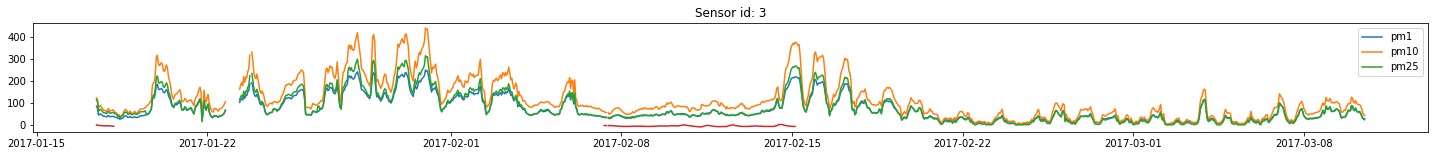

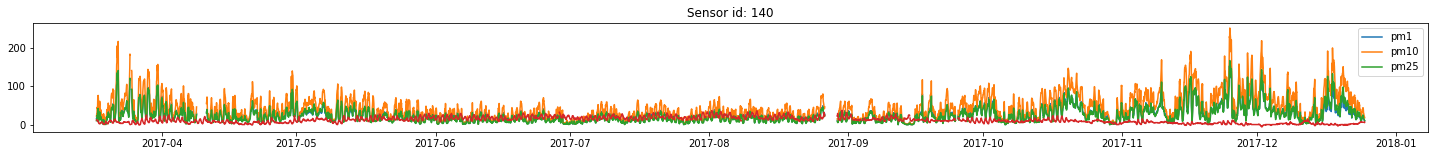

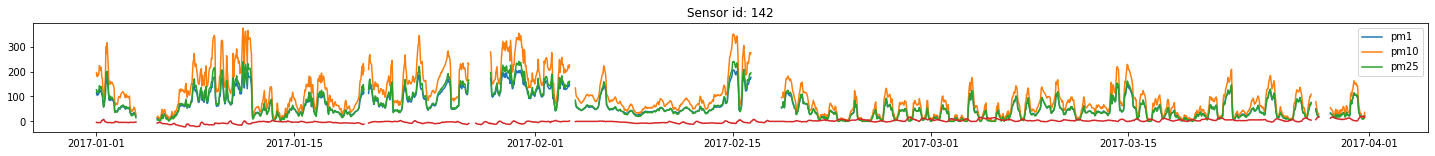

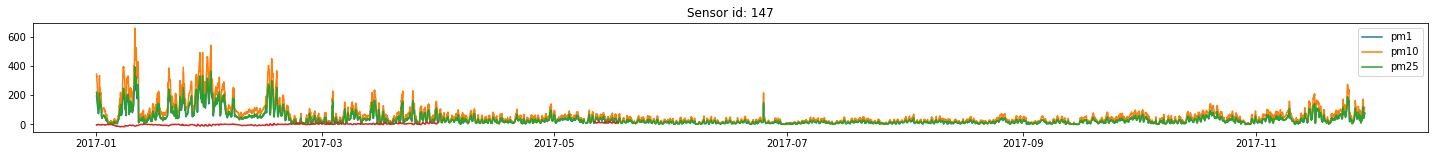

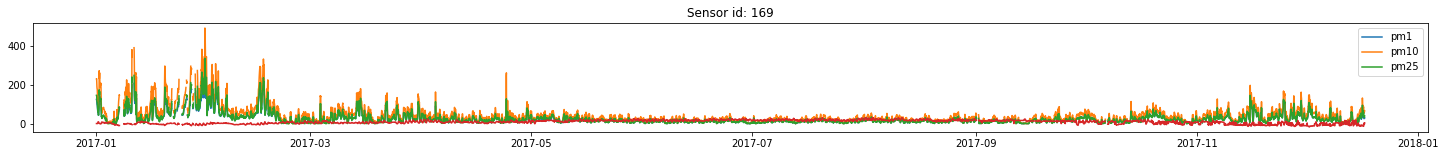

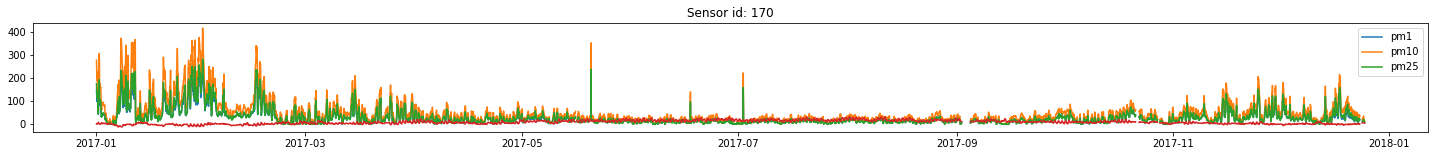

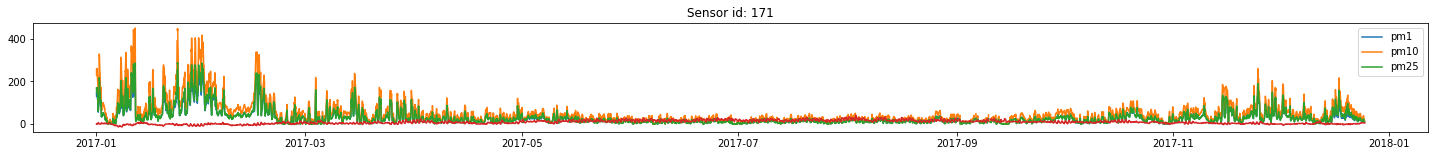

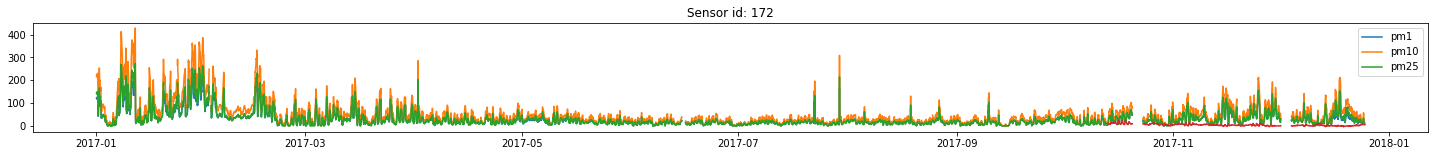

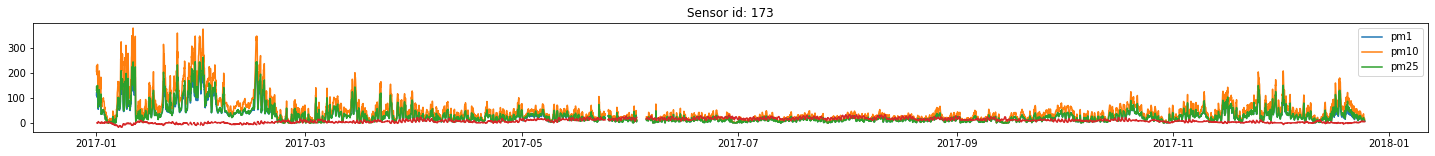

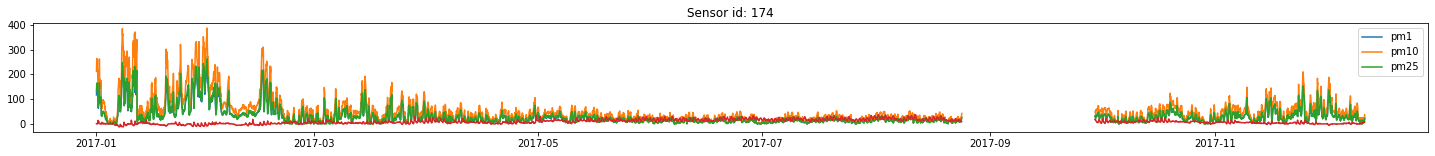

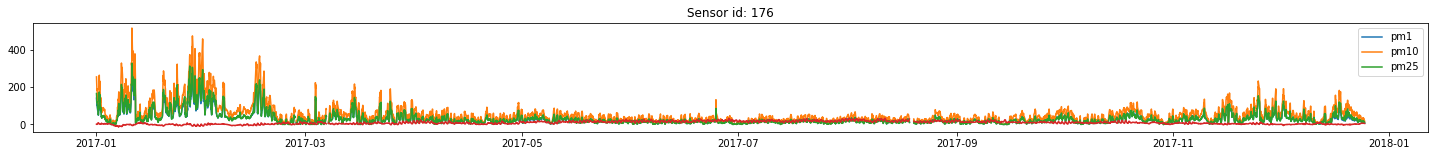

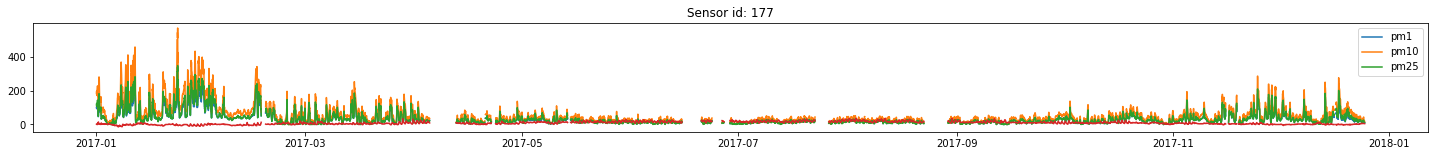

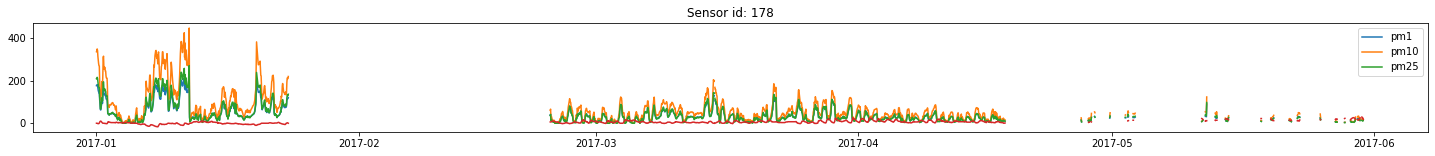

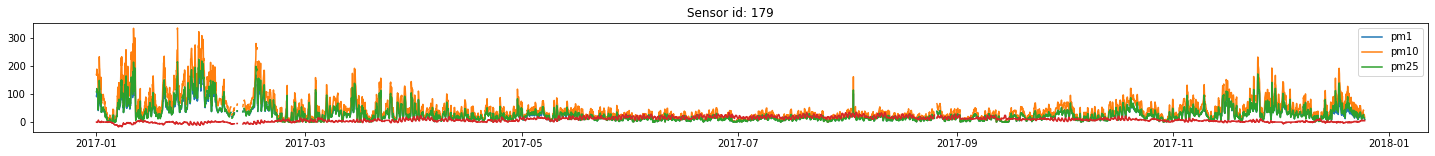

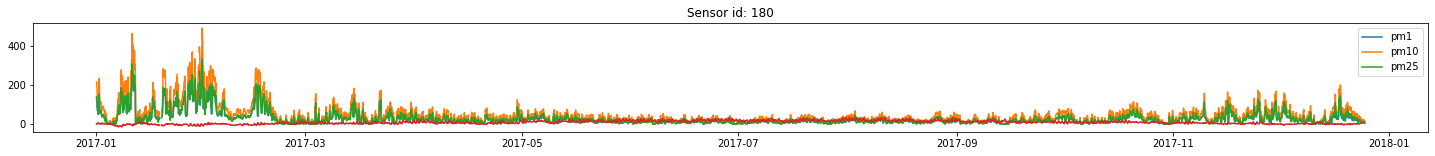

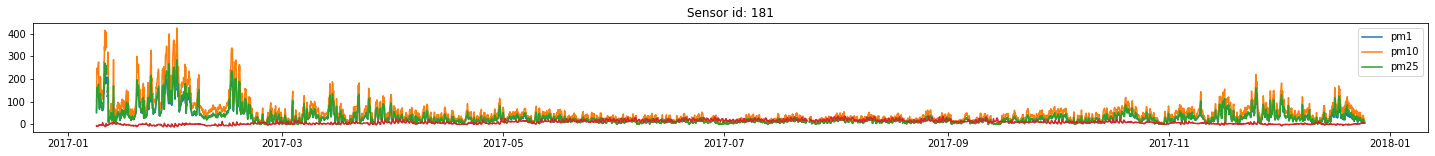

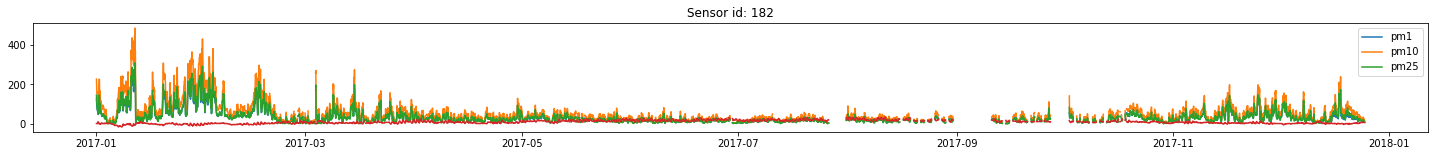

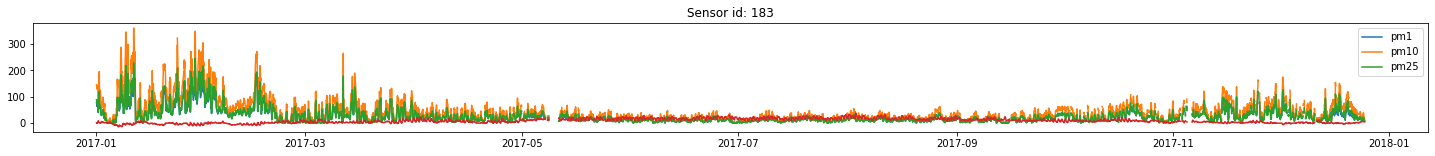

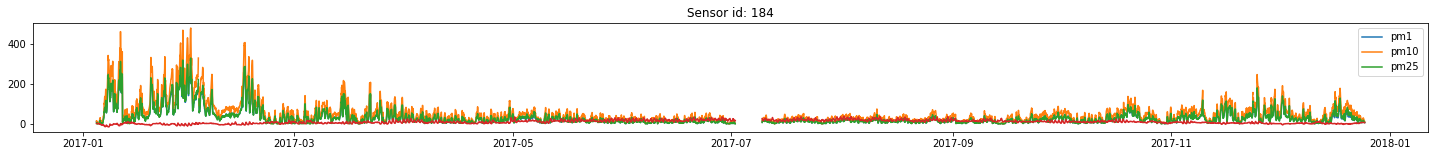

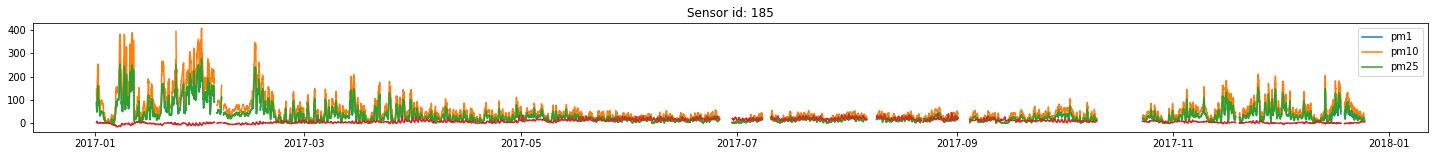

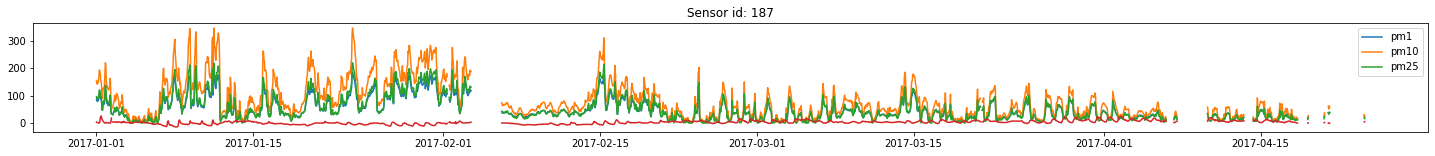

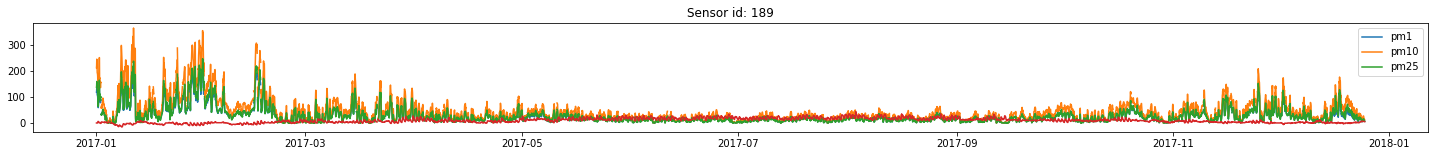

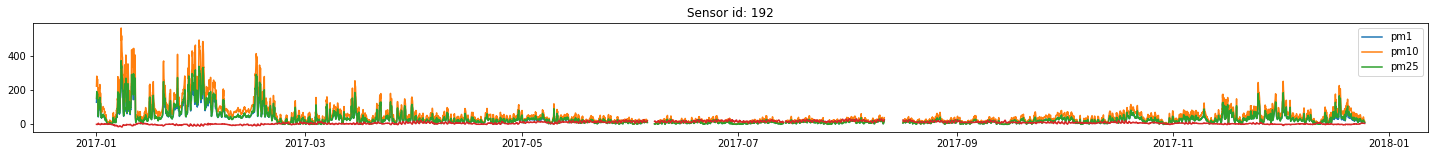

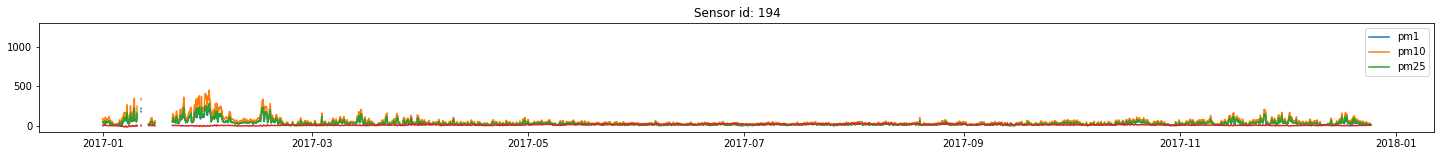

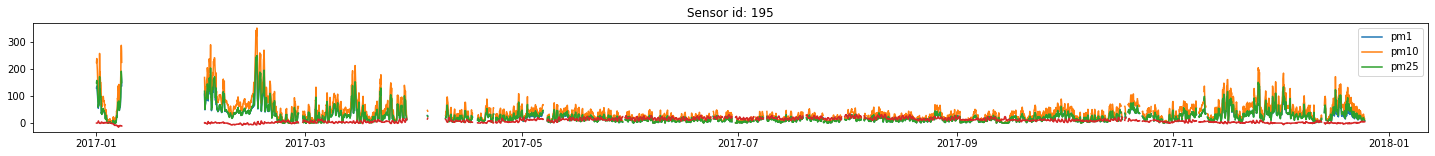

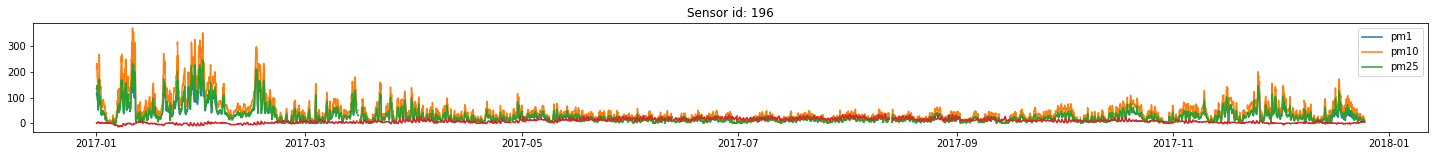

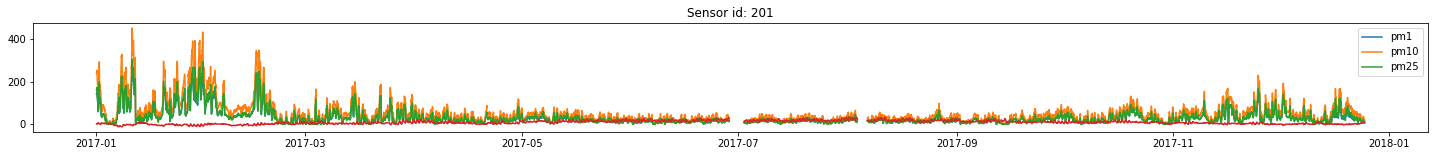

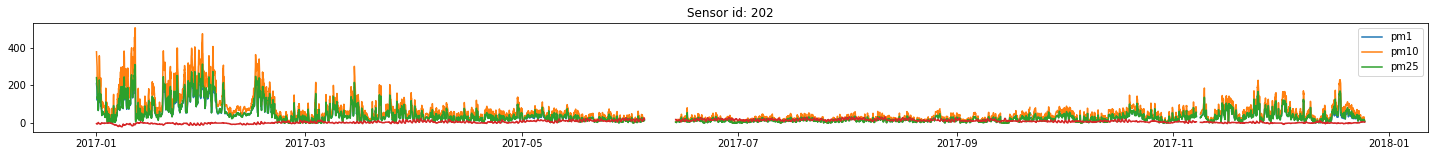

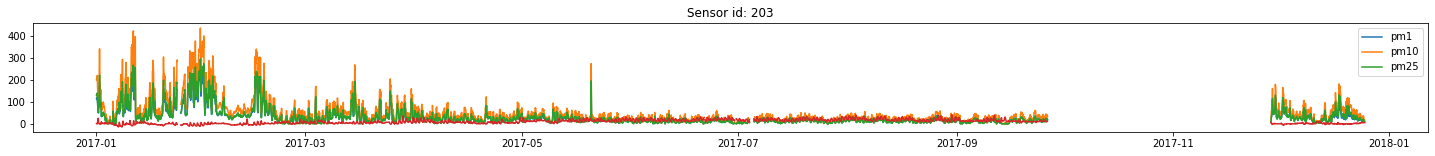

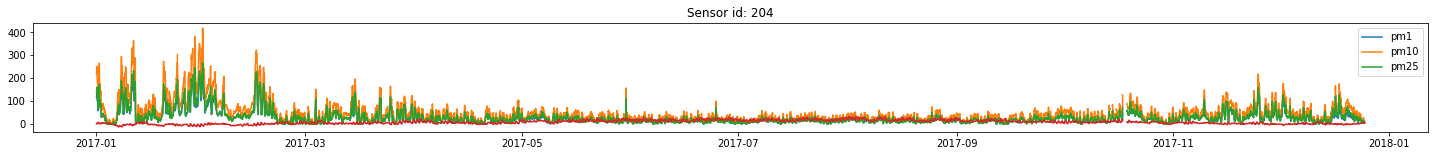

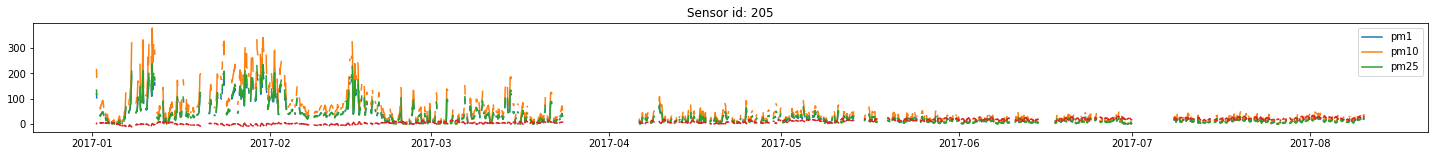

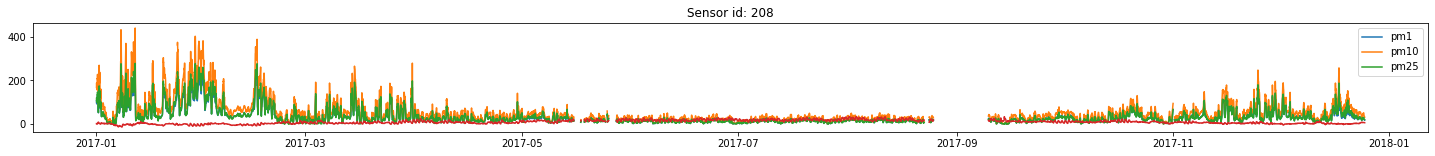

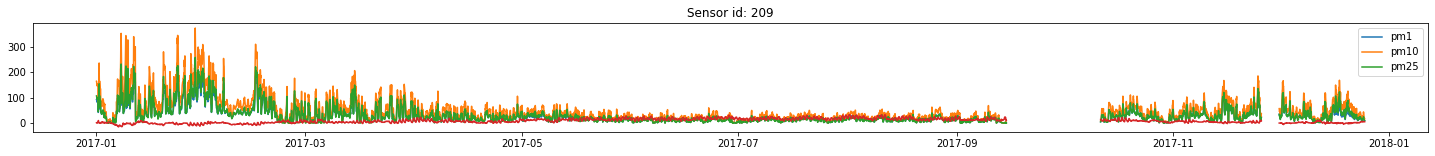

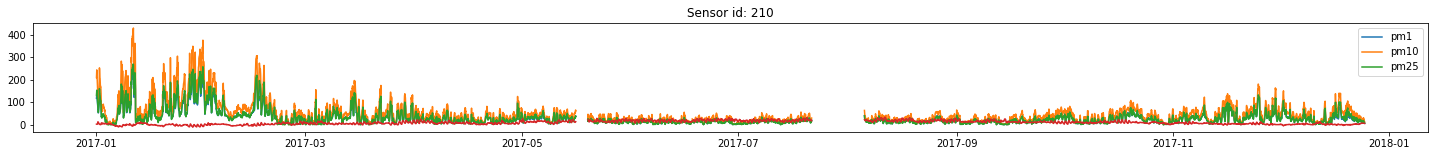

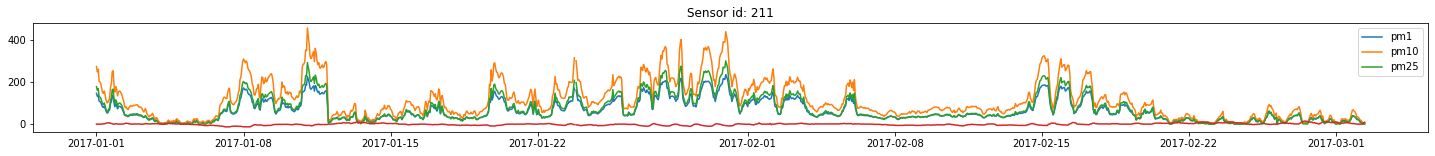

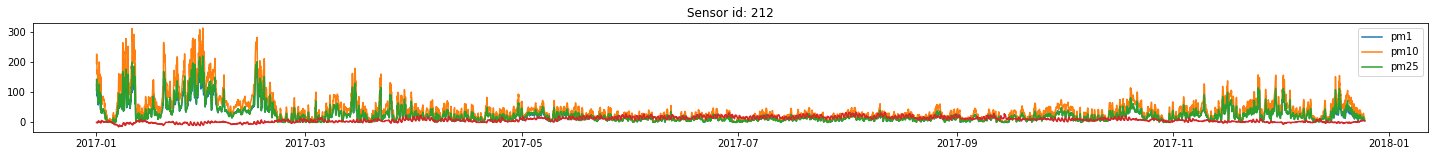

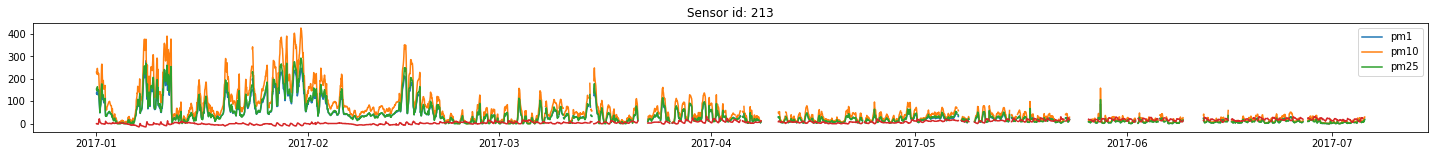

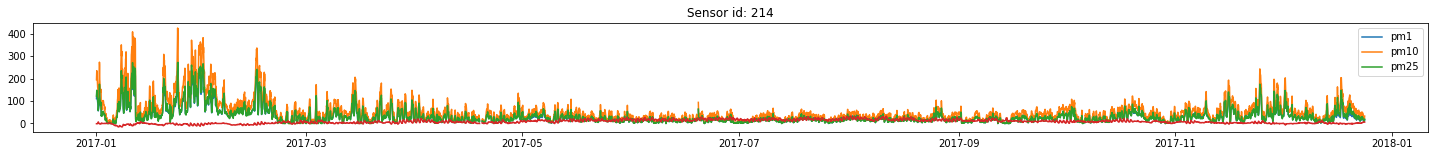

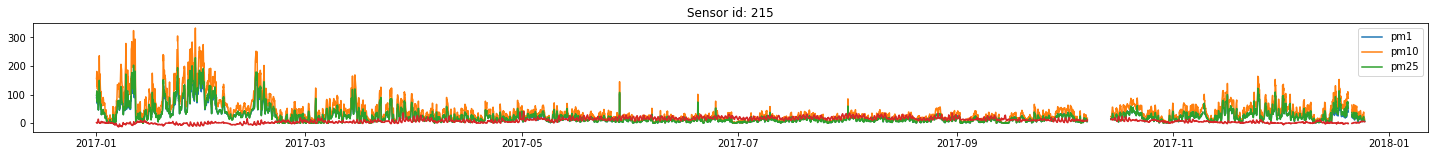

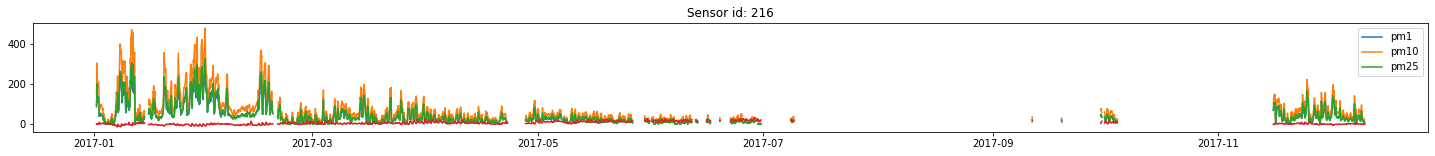

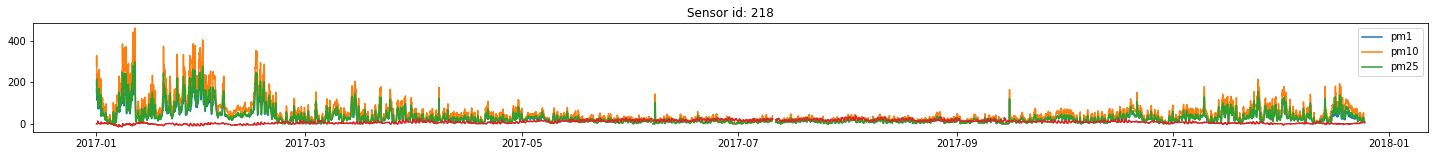

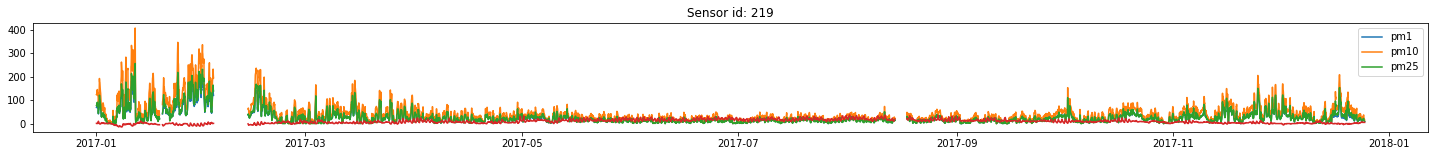

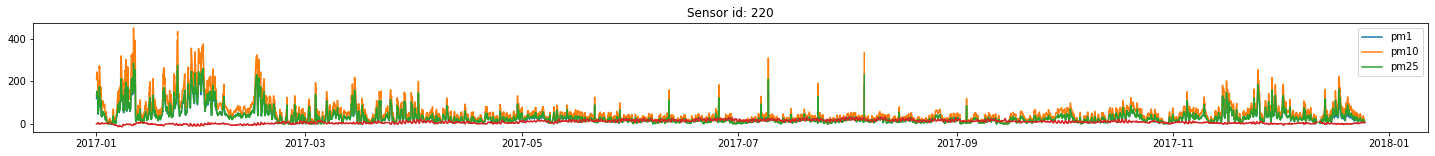

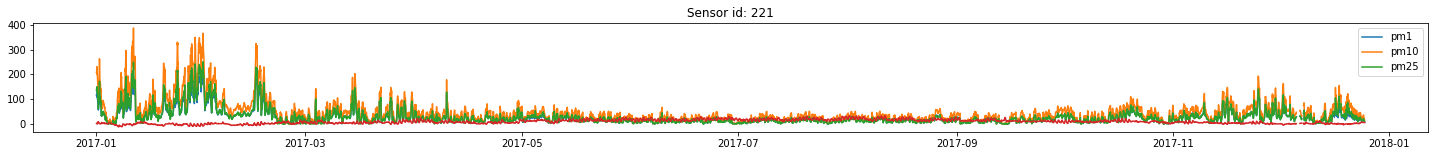

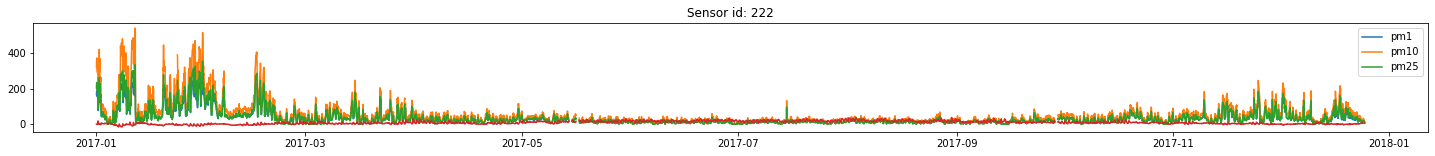

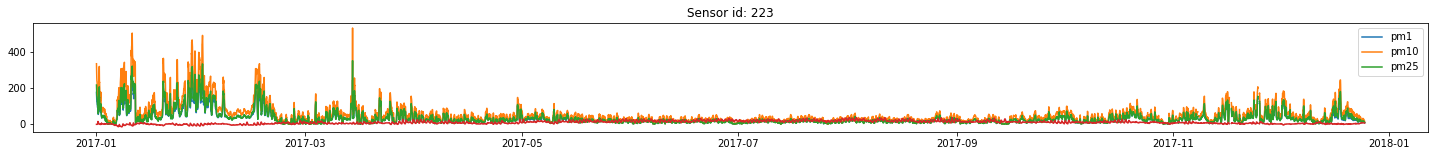

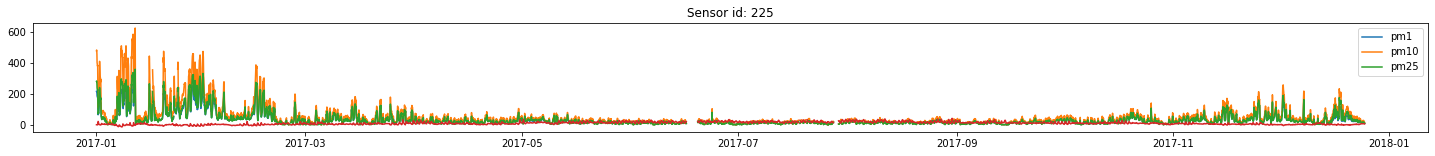

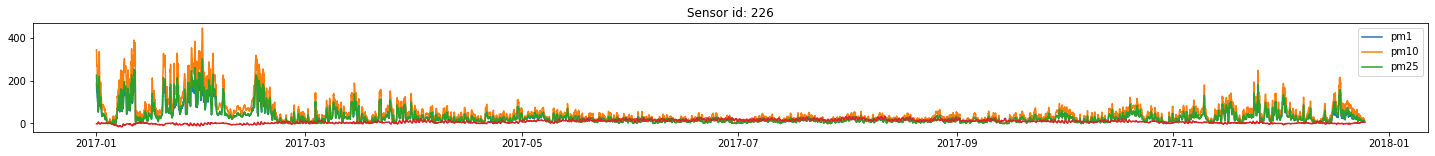

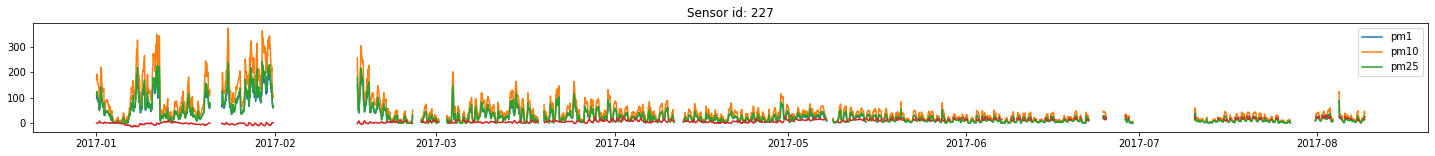

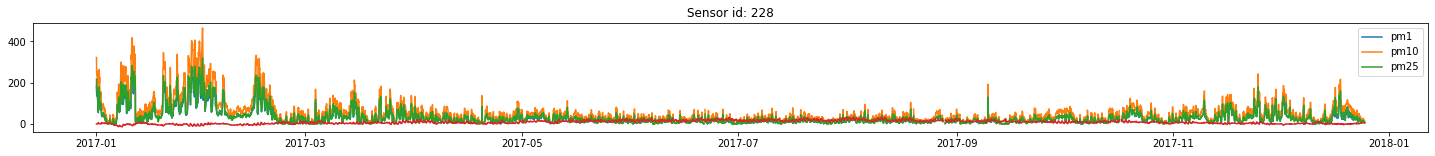

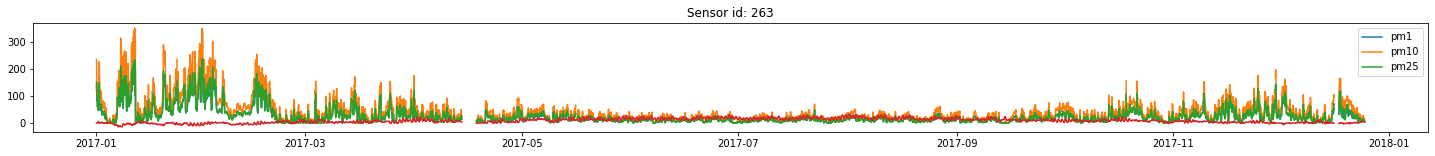

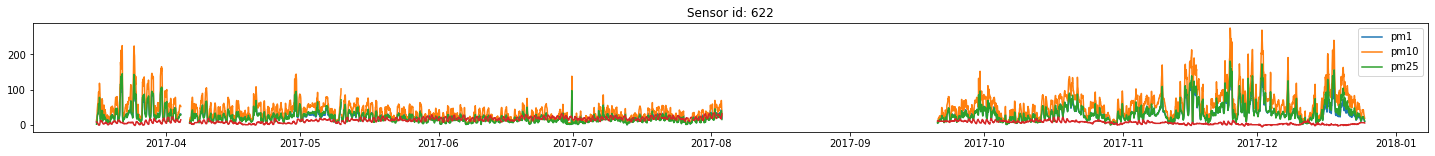

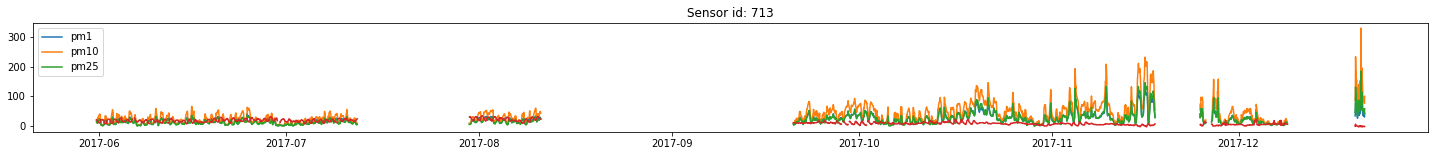

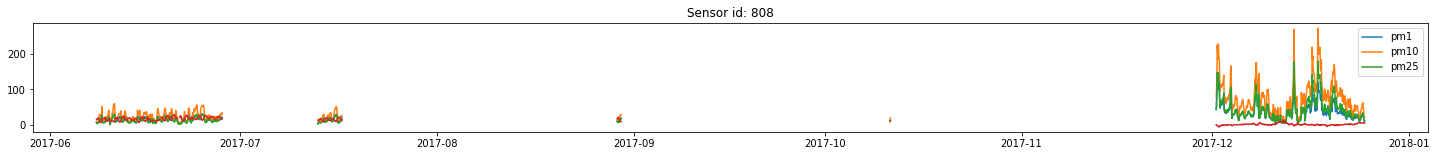

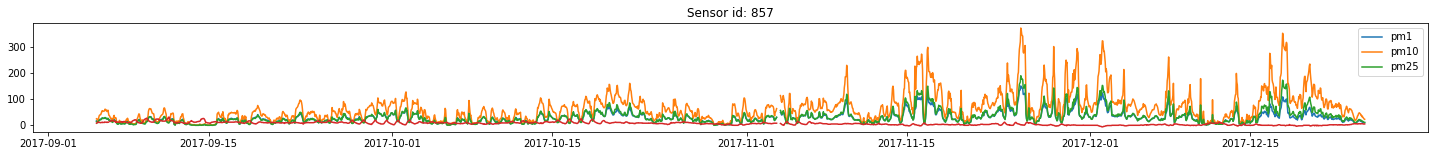

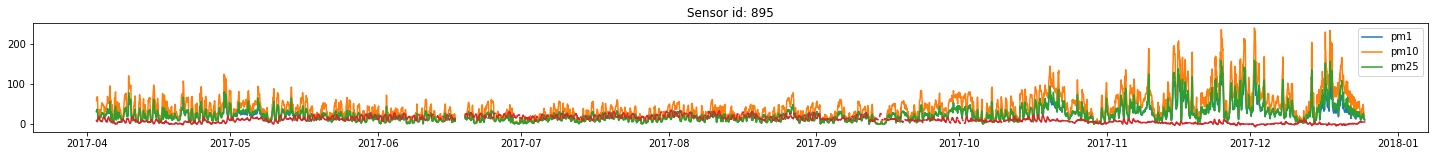

In [27]:
sensor_ids = sensors.id.unique()
for sensor in sensor_ids:
    cols = [column for column in data.columns if column.startswith(str(sensor))]
    plot_data = data[cols + ['UTC time']]
    plt.figure(figsize=(25, 2))
    plt.plot(plot_data['UTC time'], plot_data['{}_pm1'.format(sensor)])
    plt.plot(plot_data['UTC time'], plot_data['{}_pm10'.format(sensor)])
    plt.plot(plot_data['UTC time'], plot_data['{}_pm25'.format(sensor)])
    plt.plot(plot_data['UTC time'], plot_data['{}_temperature'.format(sensor)])
    plt.legend(['pm1', 'pm10', 'pm25']);
    plt.title('Sensor id: {}'.format(sensor))

#     joint = sns.jointplot(data=plot_data, x='{}_temperature'.format(sensor), y='{}_pm1'.format(sensor), kind='reg')
#     joint.annotate(pearsonr)
#     joint = sns.jointplot(data=plot_data, x='{}_temperature'.format(sensor), y='{}_pm10'.format(sensor))
#     joint.annotate(pearsonr)
#     joint = sns.jointplot(data=plot_data, x='{}_temperature'.format(sensor), y='{}_pm1'.format(sensor))
#     joint.annotate(pearsonr)

We wszystkich wykresach widać duży skok na początku i końcu roku. Patrząc na temperatury można zauważyć delikatną odwrotną korelację pomiędzy stężeniem zanieczyszczeń a temperaturą (jointploty pokazują pearsonr w okolicach -0.5).

In [21]:
plot_data

895_temperature  895_humidity  895_pressure  895_pm1  895_pm25  895_pm10  \
0                NaN           NaN           NaN      NaN       NaN       NaN   
1                NaN           NaN           NaN      NaN       NaN       NaN   
2                NaN           NaN           NaN      NaN       NaN       NaN   
3                NaN           NaN           NaN      NaN       NaN       NaN   
4                NaN           NaN           NaN      NaN       NaN       NaN   
..               ...           ...           ...      ...       ...       ...   
572              5.0          85.0      101798.0     13.0      15.0      26.0   
573              5.0          85.0      101840.0     12.0      13.0      23.0   
574              5.0          82.0      101839.0     10.0      12.0      21.0   
575              5.0          85.0      101837.0     10.0      12.0      21.0   
576              5.0          85.0      101840.0     10.0      11.0      20.0   

               UTC time  
0   2017-01-01 00:00:00  
1   2017-01-01 01:00:00  
2   2017-01-01 02:00:00  
3   2017-01-01 03:00:00  
4   2017-01-01 04:00:00  
..                  ...  
572 2017-12-24 20:00:00  
573 2017-12-24 21:00:00  
574 2017-12-24 22:00:00  
575 2017-12-24 23:00:00  
576 2017-12-25 00:00:00  

[8593 rows x 7 columns]